# Classification Mini Project

## House Grade Classification:
Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way, the search for the house can be narrowed down by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) – E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house. 

### Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore')

### Reading data

In [21]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

In [22]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


### Checking for null values

In [24]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

There are no null values

## Data Analysis

<AxesSubplot:xlabel='Expected price'>

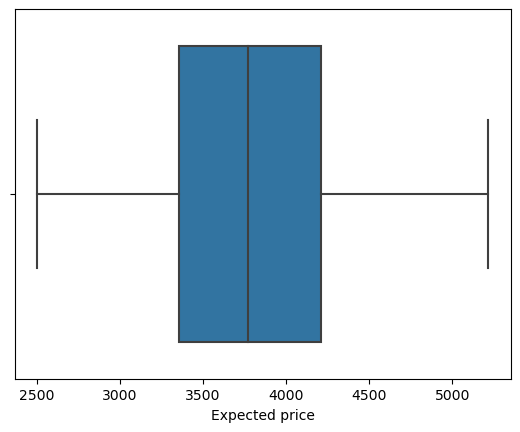

In [25]:
sns.boxplot(x=df['Expected price'])

<AxesSubplot:xlabel='Area(total)'>

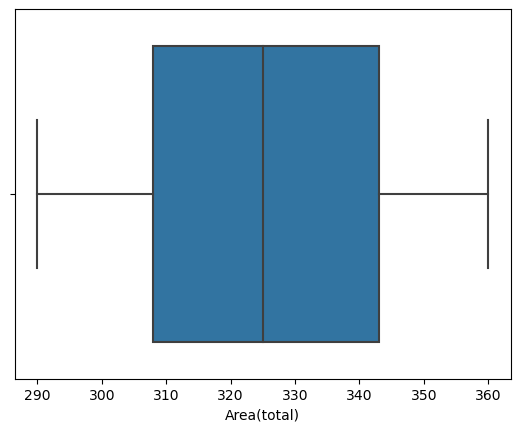

In [26]:
sns.boxplot(x=df['Area(total)'])

<AxesSubplot:xlabel='Grade', ylabel='Expected price'>

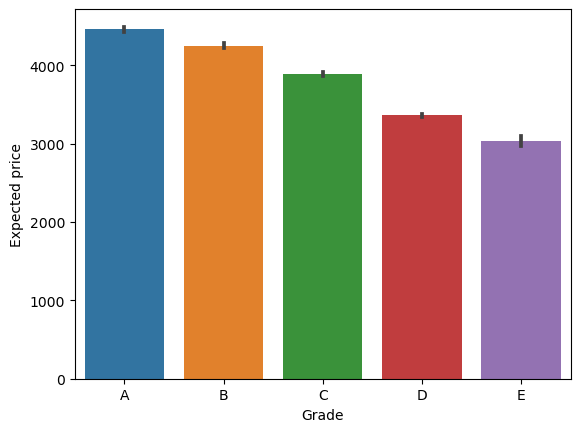

In [27]:
sns.barplot(x="Grade",y="Expected price",data=df,order=['A','B','C','D','E'])

As the Grade decreases Price of the property also decreases

<AxesSubplot:xlabel='Grade', ylabel='Area(total)'>

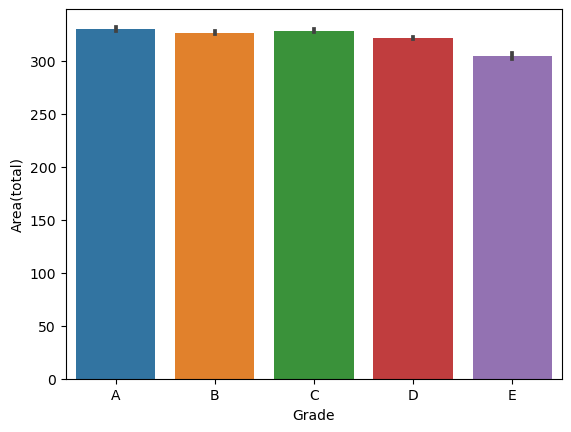

In [28]:
sns.barplot(x="Grade",y="Area(total)",data=df,order=['A','B','C','D','E'])

As the Grade decreases Total of the property also decreases overall but the difference is very less noticable

<AxesSubplot:xlabel='Grade', ylabel='Trooms'>

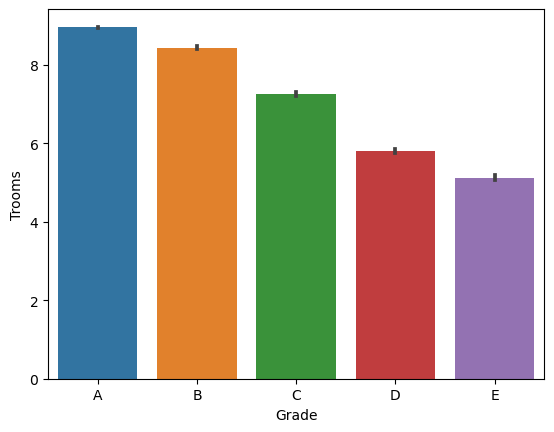

In [29]:
sns.barplot(x="Grade",y="Trooms",data=df,order=['A','B','C','D','E'])

<AxesSubplot:xlabel='Grade', ylabel='count'>

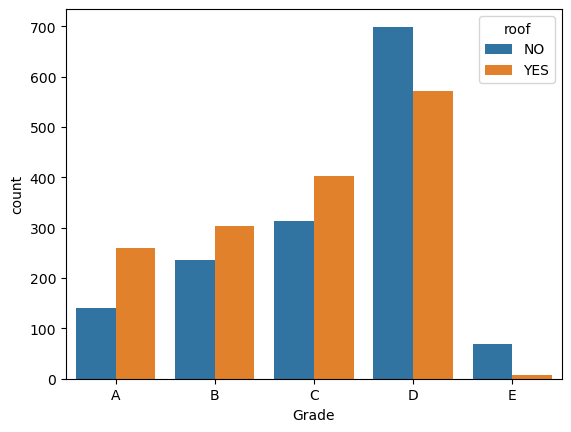

In [30]:
sns.countplot(x="Grade",hue="roof",data=df,order=['A','B','C','D','E'])

<AxesSubplot:xlabel='Grade', ylabel='Nfloors'>

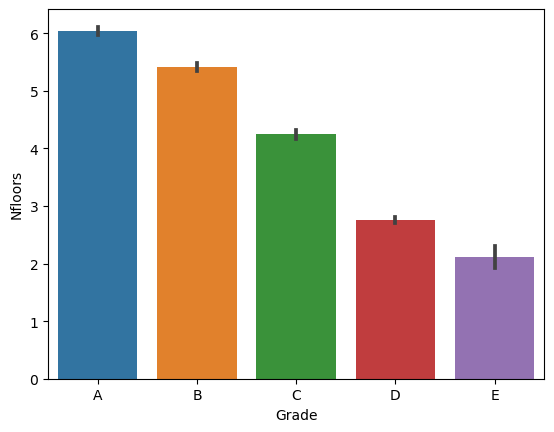

In [31]:
sns.barplot(x="Grade",y="Nfloors",data=df,order=['A','B','C','D','E'])

In [32]:
labelbin = LabelBinarizer() ## to convert roof to numerical
df["roof"]=labelbin.fit_transform(df["roof"])

In [33]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,B


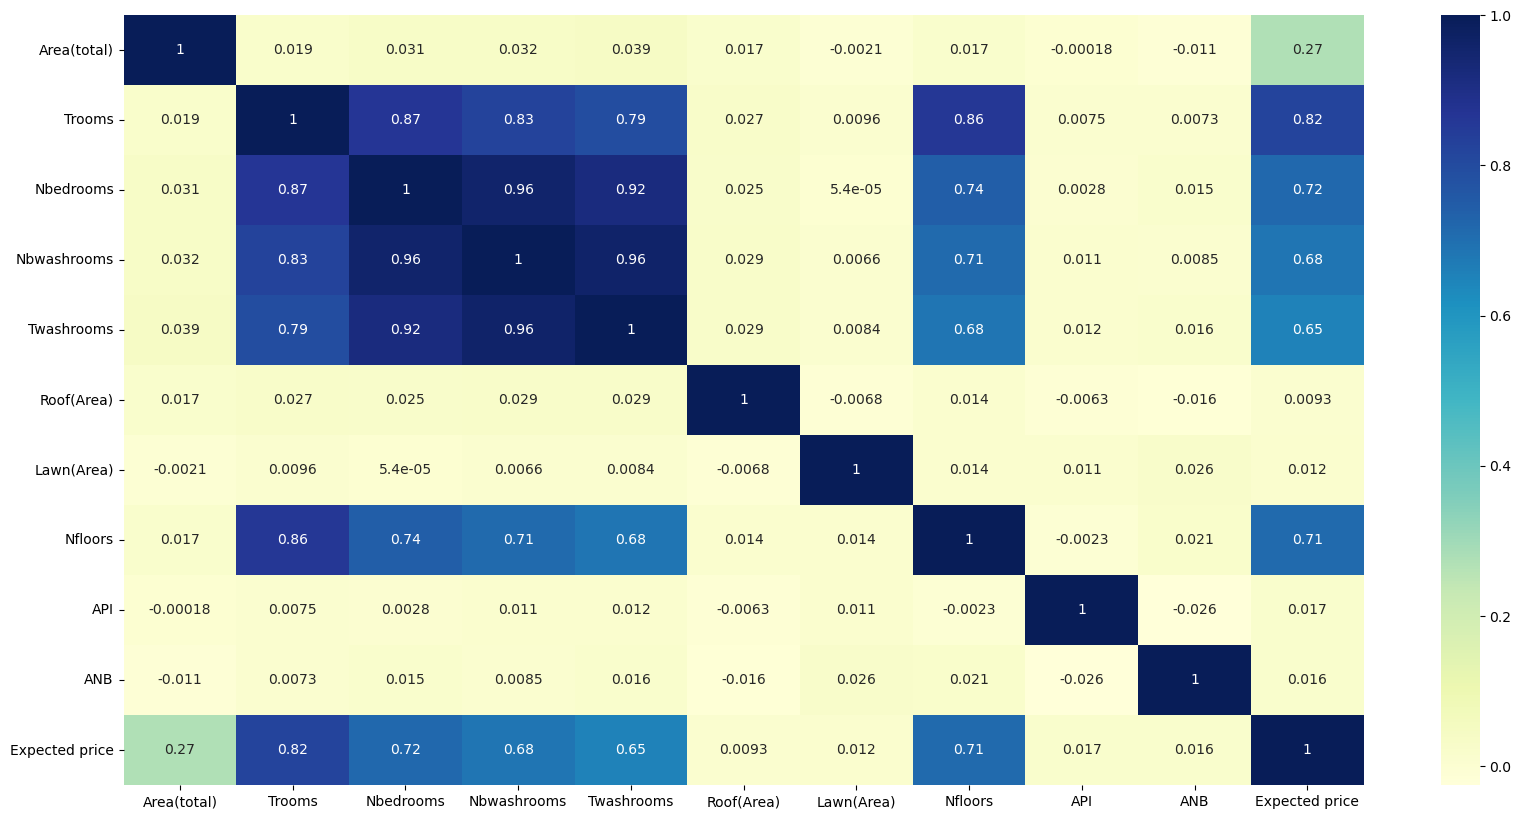

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop("Id",axis=1).select_dtypes(['float64' , 'int64']).corr(),annot=True,cmap="YlGnBu")
plt.show()

Id","Grade","API","ANB",'Roof(Area)','Lawn(Area)' are having no effect on any of the other columns

In [35]:
def classifier(model):
    accuracy = round(model.score(X_test, y_test)*100,2)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    matrix = pd.DataFrame(cm)
    matrix.rename(columns={0:"A",1:"B",2:"C",3:"D",4:"E"},index = {0:"A",1:"B",2:"C",3:"D",4:"E"},inplace=True)
    plt.figure(figsize=(7,5))
    plt.title(f'Confusion Matrix of {model}', fontsize = 20)
    sns.heatmap(matrix,annot=True,fmt='g',cmap="YlGnBu")
    plt.xlabel('Predicted Values',fontsize = 20)
    plt.ylabel('Actual Values',fontsize = 20)
    print(f"The accuracy of {model} is {accuracy} %\n")
    print(classification_report(y_test, y_pred))
    plt.show()
    return

In [36]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,B


## Spliting the Dataset

In [72]:
X = df.drop(["Id","Grade","API","ANB",'Roof(Area)','Lawn(Area)'], axis=1)
y = df["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,random_state =10)

In [105]:
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Nfloors,Expected price
0,339,6,5,4,6,0,2,3481
1,358,5,4,3,4,1,3,3510
2,324,7,5,4,5,1,5,3748
3,330,6,4,3,5,1,2,3134
4,320,7,4,4,5,0,3,3843
...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,5,4246
2996,292,9,8,7,8,1,7,3753
2997,328,7,4,3,5,0,5,3607
2998,293,9,7,7,8,0,7,4198


## Comparing different Classifiers

### KNeighborsClassifier

In [73]:
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10]}
grid_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_estimator_)

KNeighborsClassifier(n_neighbors=8)


In [74]:
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)

The accuracy of KNeighborsClassifier(n_neighbors=8) is 53.22 %

              precision    recall  f1-score   support

           A       0.37      0.50      0.42        96
           B       0.32      0.26      0.29       167
           C       0.37      0.29      0.32       224
           D       0.71      0.83      0.76       390
           E       0.00      0.00      0.00        23

    accuracy                           0.53       900
   macro avg       0.35      0.38      0.36       900
weighted avg       0.50      0.53      0.51       900



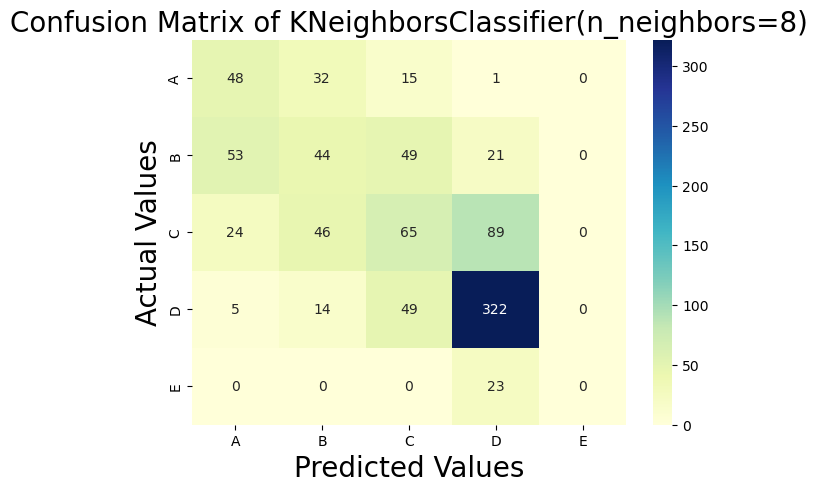

In [75]:
classifier(knn)

### Gaussian Naive Bayes Classifier

In [76]:
gb = GaussianNB().fit(X_train, y_train)

The accuracy of GaussianNB() is 76.11 %

              precision    recall  f1-score   support

           A       0.84      0.84      0.84        96
           B       0.71      0.80      0.75       167
           C       0.66      0.64      0.65       224
           D       0.86      0.81      0.83       390
           E       0.35      0.48      0.41        23

    accuracy                           0.76       900
   macro avg       0.69      0.71      0.70       900
weighted avg       0.77      0.76      0.76       900



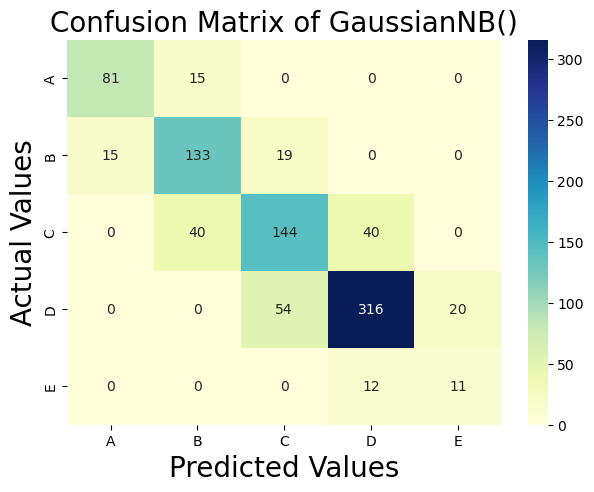

In [77]:
classifier(gb)

### Random Forest Classifier

In [49]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11,12],'n_estimators': [100,200,500,1000,1200]}
grid_rdf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
grid_rdf.best_params_

{'max_depth': 12, 'n_estimators': 1000}

In [78]:
random_forest = RandomForestClassifier(n_estimators=1000,max_depth=12).fit(X_train, y_train)

The accuracy of RandomForestClassifier(max_depth=12, n_estimators=1000) is 86.33 %

              precision    recall  f1-score   support

           A       0.86      0.94      0.90        96
           B       0.90      0.77      0.83       167
           C       0.82      0.80      0.81       224
           D       0.88      0.96      0.92       390
           E       0.75      0.26      0.39        23

    accuracy                           0.86       900
   macro avg       0.84      0.74      0.77       900
weighted avg       0.86      0.86      0.86       900



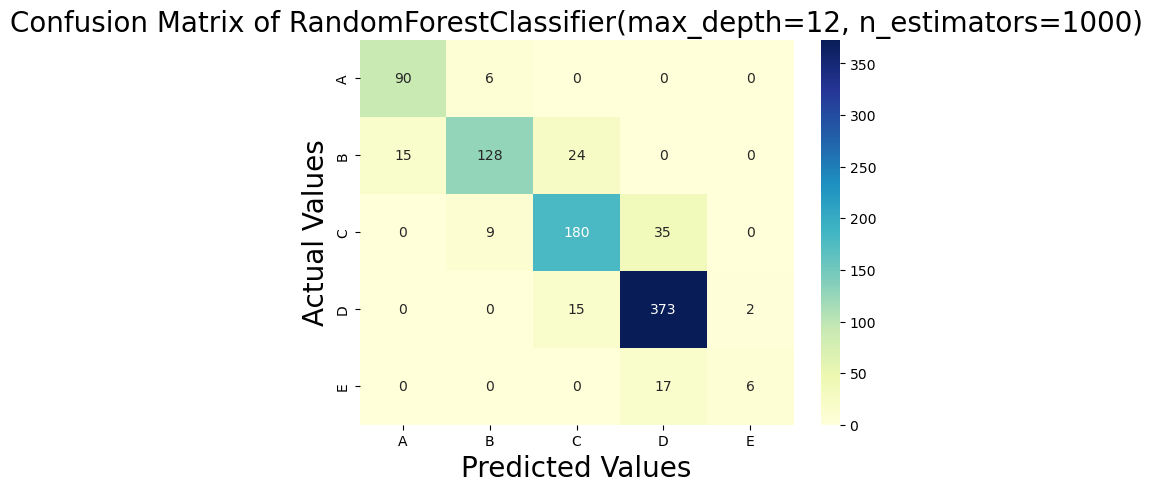

In [79]:
classifier(random_forest)

### Support Vector Classifier

In [80]:
svc = SVC(kernel='linear',C = 1).fit(X_train, y_train)

The accuracy of SVC(C=1, kernel='linear') is 88.78 %

              precision    recall  f1-score   support

           A       0.90      0.96      0.93        96
           B       0.88      0.87      0.88       167
           C       0.86      0.82      0.84       224
           D       0.90      0.95      0.92       390
           E       0.89      0.35      0.50        23

    accuracy                           0.89       900
   macro avg       0.89      0.79      0.81       900
weighted avg       0.89      0.89      0.88       900



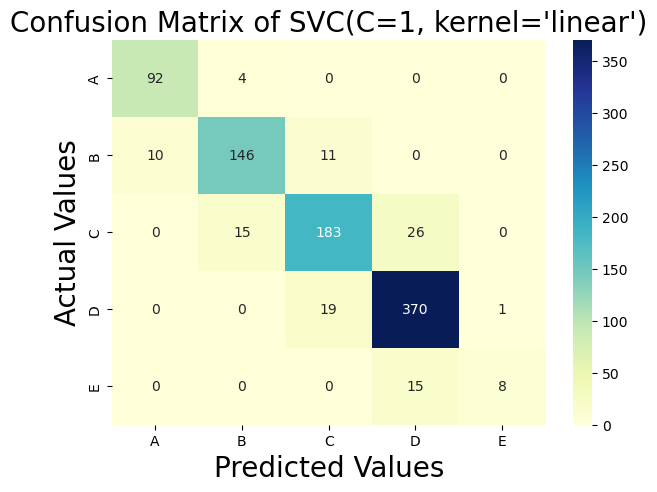

In [81]:
classifier(svc)

### Decision Tree Classifier

In [99]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11,12]}
grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_dtc.fit(X_train, y_train)
grid_dtc.best_params_

{'max_depth': 8}

In [100]:
dtree = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)

The accuracy of DecisionTreeClassifier(max_depth=8) is 82.22 %

              precision    recall  f1-score   support

           A       0.80      0.93      0.86        96
           B       0.83      0.68      0.75       167
           C       0.75      0.79      0.77       224
           D       0.88      0.91      0.90       390
           E       0.46      0.26      0.33        23

    accuracy                           0.82       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.82      0.82      0.82       900



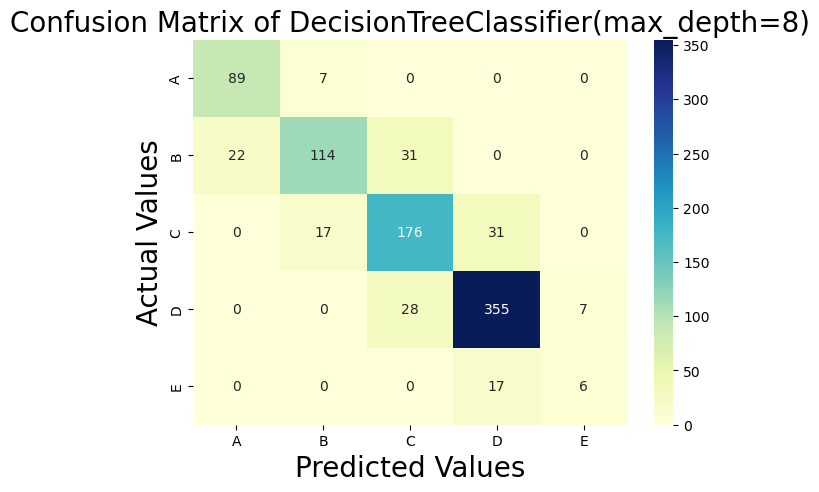

In [101]:
classifier(dtree)

### Ada Boost Classifier

In [102]:
param_grid = {'n_estimators': [100,200,500,1000,1200]}
grid_rdf = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
grid_rdf.best_params_

{'n_estimators': 100}

In [103]:
ada = AdaBoostClassifier(SVC(kernel='linear',C = 1),algorithm='SAMME',n_estimators=100).fit(X_train, y_train)

The accuracy of AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(C=1, kernel='linear'),
                   n_estimators=100) is 76.33 %

              precision    recall  f1-score   support

           A       0.68      0.90      0.77        96
           B       0.76      0.66      0.71       167
           C       0.78      0.63      0.70       224
           D       0.84      0.86      0.85       390
           E       0.31      0.65      0.42        23

    accuracy                           0.76       900
   macro avg       0.67      0.74      0.69       900
weighted avg       0.78      0.76      0.77       900



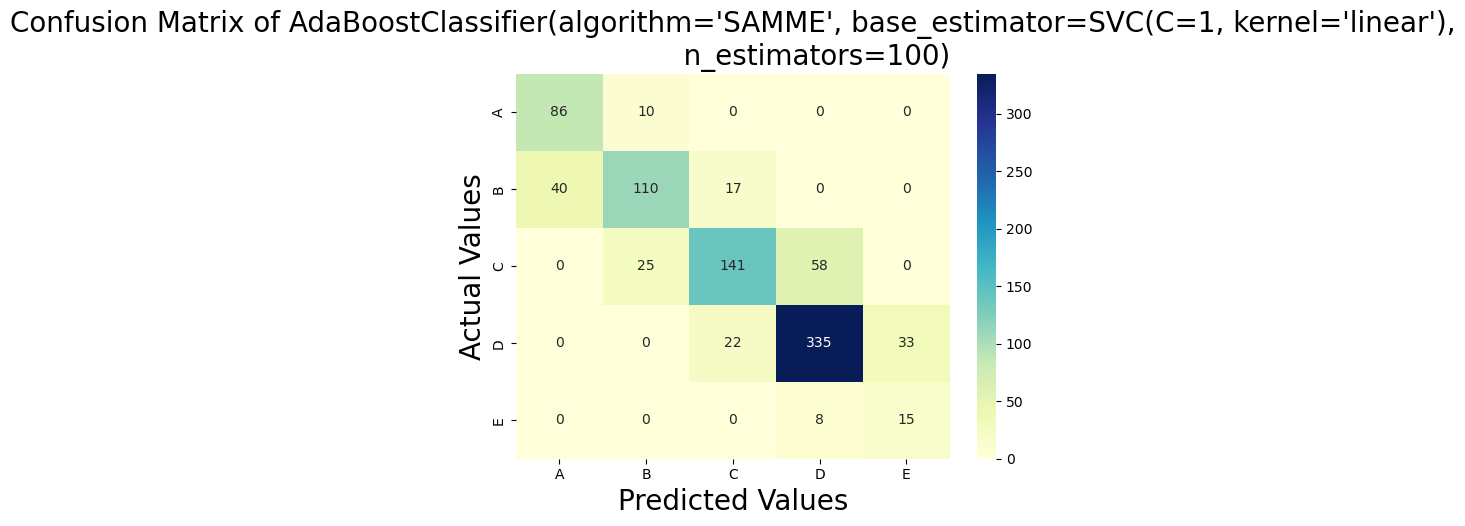

In [104]:
classifier(ada)

## Conclusion:
After comparing all the different types of classifier we can observe that SVC(Support Vector Classifier) has the best model accuracy and individual all grade's best precision and f1-score

## Final Model:

In [84]:
svc_final = SVC(kernel='linear',C = 1).fit(X_train,y_train)

In [85]:
svc_final

SVC(C=1, kernel='linear')

The accuracy of SVC(C=1, kernel='linear') is 88.78 %

              precision    recall  f1-score   support

           A       0.90      0.96      0.93        96
           B       0.88      0.87      0.88       167
           C       0.86      0.82      0.84       224
           D       0.90      0.95      0.92       390
           E       0.89      0.35      0.50        23

    accuracy                           0.89       900
   macro avg       0.89      0.79      0.81       900
weighted avg       0.89      0.89      0.88       900



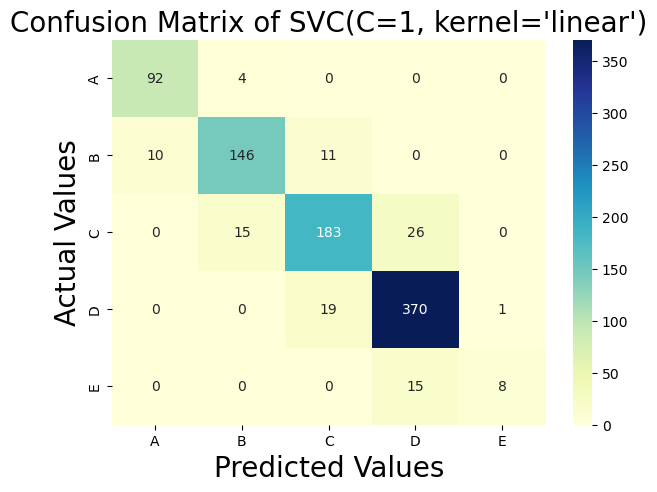

In [86]:
classifier(svc_final)

In [87]:
final_df = X_test.copy()
final_df["Actual Grade"]=y_test
final_df["Predicted Grade"]=svc_final.predict(X_test)
final_df   

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Nfloors,Expected price,Actual Grade,Predicted Grade
1779,358,5,2,2,4,0,2,3441,D,D
341,349,6,3,2,4,0,2,3970,D,D
1276,315,7,6,5,7,0,5,3714,C,C
1012,359,6,5,4,6,0,2,3294,D,D
470,290,9,6,5,6,0,7,3915,B,B
...,...,...,...,...,...,...,...,...,...,...
2857,299,7,5,5,6,0,4,3451,D,D
1561,305,9,7,7,9,1,5,4525,B,B
908,340,6,3,2,4,1,4,3455,D,D
1839,290,6,3,3,4,1,2,2897,D,D
